In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn import preprocessing
import scipy.spatial.distance as dist
from scipy import stats
from scipy.stats.stats import pearsonr

In [2]:
data = pd.read_excel("dataset.xlsx").head(50)

In [3]:
print(data.head(3))

                        Name  NOB   V  SH   CS  CDR    TD       NOC       CBO  \
0             Alarmio-master   22  17   3  169  1.4   1.0  0.364583  2.000000   
1    AndroidAsyncHTTP-master   11  20  14  494  4.7   6.0  0.474684  2.208861   
2  android-pdf-viewer-master    2   1   0    4  0.0  12.2  0.000000  0.500000   

         RFC        LOC       CLOC     FanIn    FanOut       LCOM       WMC  \
0   5.802083  27.260802   3.567901  3.427686  4.367769  21.252630  5.464506   
1  24.006329  25.996479  10.336268  3.172492  2.727170  17.430380  5.158451   
2   1.833333  18.280000   4.560000  1.727273  3.454545   9.666667  2.560000   

        DIT  
0  1.968750  
1  2.177215  
2  1.666667  


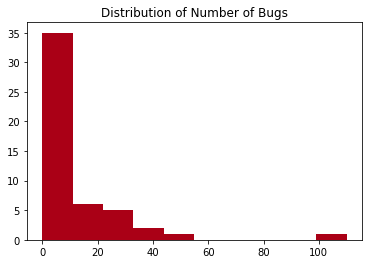

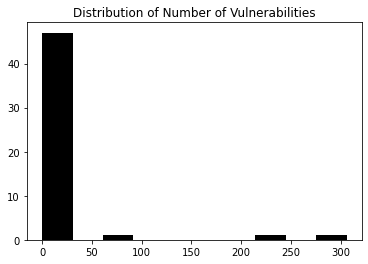

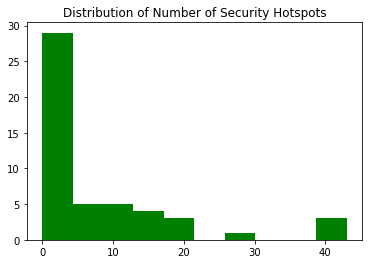

In [4]:
#show the distribution of 3 metrics
def plotHist(coulumnIndex,columnName,colorName):
    global data
    x = data[coulumnIndex]
    plt.hist(x, bins=10, color=colorName)
    plt.gca().set(title= (f"Distribution of Number of {columnName}"))
    plt.show()
    #write your code here
plotHist("NOB","Bugs","#aa0016")
plotHist("V","Vulnerabilities","black")
plotHist("SH","Security Hotspots", "g")

In [5]:
data_without_string = data.drop("Name", axis = 1)
x = data_without_string
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_data = pd.DataFrame(x_scaled)
print(new_data)

           0         1         2       3         4         5         6  \
0   0.200000  0.055556  0.069767  0.0845  0.070707  0.081967  0.450368   
1   0.100000  0.065359  0.325581  0.2470  0.237374  0.491803  0.586374   
2   0.018182  0.003268  0.000000  0.0020  0.000000  1.000000  0.000000   
3   0.009091  0.003268  0.023256  0.0030  0.000000  0.172131  0.102941   
4   0.000000  0.019608  0.000000  0.1265  0.171717  0.344262  0.044649   
5   0.036364  0.058824  0.162791  0.0500  0.191919  0.254098  0.247059   
6   0.136364  0.009804  0.000000  0.0775  0.151515  0.081967  0.298861   
7   0.009091  0.000000  0.000000  0.0345  0.050505  0.016393  0.000000   
8   0.309091  1.000000  1.000000  1.0000  0.510101  0.139344  0.618665   
9   0.000000  0.039216  0.186047  0.0670  0.000000  0.245902  0.315394   
10  0.000000  0.000000  0.000000  0.0015  0.000000  0.008197  0.000000   
11  0.000000  0.000000  0.000000  0.0120  0.000000  0.024590  0.000000   
12  0.000000  0.000000  0.000000  0.01

# Part1 (Statistical Correlation Analysis)

In [6]:
corrMatrix = data.corr(method="spearman")
display(corrMatrix)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [7]:
#P values of Spearman Correlation Table
coef, p = stats.spearmanr(new_data)
p=pd.DataFrame(np.around(p,4))
p.columns = corrMatrix.columns
p.index = corrMatrix.columns
display(p)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


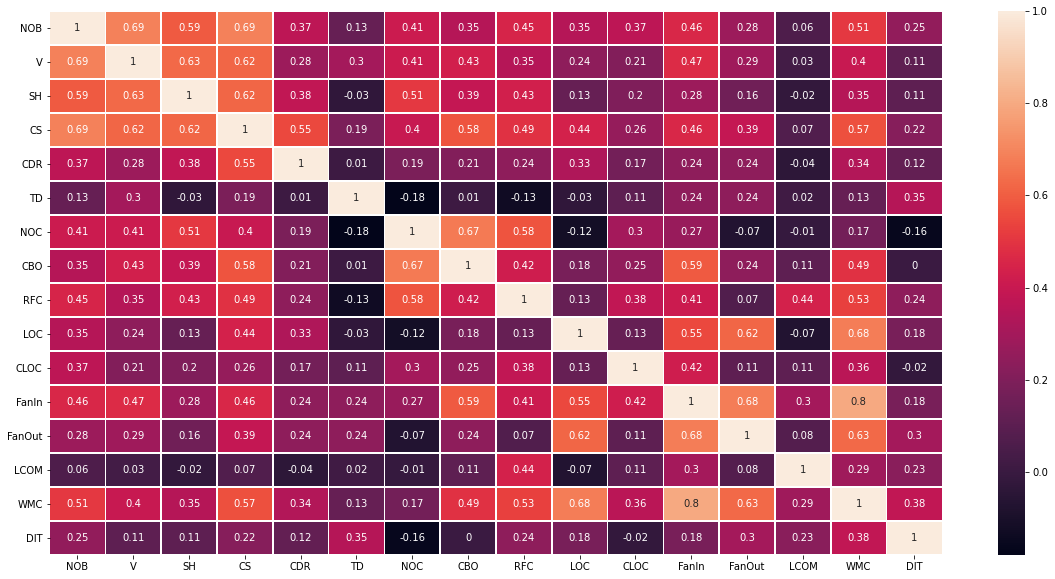

In [8]:
#If you want to see heatmap of the correlation matrix, you can launch code below:

roundTwo = corrMatrix.round(decimals=2)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(roundTwo, linewidth=0.5,annot=True)
plt.show()

In [9]:
#Correlation between External Metrics & TD
print(corrMatrix.iloc[:6,:6])

          NOB         V        SH        CS       CDR        TD
NOB  1.000000  0.694733  0.587592  0.691274  0.373251  0.133383
V    0.694733  1.000000  0.629663  0.624194  0.280358  0.296757
SH   0.587592  0.629663  1.000000  0.618509  0.384657 -0.026546
CS   0.691274  0.624194  0.618509  1.000000  0.548113  0.194611
CDR  0.373251  0.280358  0.384657  0.548113  1.000000  0.013400
TD   0.133383  0.296757 -0.026546  0.194611  0.013400  1.000000


In [10]:
#Correlation between Internal Metrics & TD
print(corrMatrix.iloc[4:, 4:])

             CDR        TD       NOC       CBO       RFC       LOC      CLOC  \
CDR     1.000000  0.013400  0.192707  0.212007  0.240992  0.328527  0.171773   
TD      0.013400  1.000000 -0.179659  0.013652 -0.126364 -0.031098  0.114297   
NOC     0.192707 -0.179659  1.000000  0.667344  0.584086 -0.120165  0.297347   
CBO     0.212007  0.013652  0.667344  1.000000  0.421247  0.177024  0.250408   
RFC     0.240992 -0.126364  0.584086  0.421247  1.000000  0.134608  0.381636   
LOC     0.328527 -0.031098 -0.120165  0.177024  0.134608  1.000000  0.126681   
CLOC    0.171773  0.114297  0.297347  0.250408  0.381636  0.126681  1.000000   
FanIn   0.243709  0.239077  0.268289  0.594578  0.414878  0.554326  0.416789   
FanOut  0.237237  0.240135 -0.074350  0.240953  0.072564  0.618676  0.109636   
LCOM   -0.038683  0.017159 -0.013518  0.109694  0.444076 -0.065455  0.107619   
WMC     0.343628  0.127638  0.173468  0.492616  0.529367  0.678224  0.355080   
DIT     0.123330  0.352010 -0.163788  0.

# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  plt.plot(y_test, y_test, color="r", label="Original Values")
  plt.scatter(y_test, y_pred, color="b", label="Predicted Values")
  plt.legend()
  plt.title(regressorName)
  print("r2 score: ", r2_score(y_test, y_pred))
  print("mean square error: ", mean_squared_error(y_test, y_pred,squared=False))
  plt.show()
  #Plot the Scatter Graph to see results better



#Linear Regressor is one of the best choice for the data that is correlated linearly:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
def linearRegression(X_train,X_test,y_train,y_test, name, type):
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  plotGraph(y_test, y_pred, name + type)



#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,X_test,y_train,y_test, name, type, kernelType):
  linear_svr=SVR(kernel= kernelType)
  linear_svr.fit(X_train,y_train)
  y_pred=linear_svr.predict(X_test)
  plotGraph(y_test, y_pred, name + type)


def decisionTreeRegression(X_train,X_test,y_train,y_test, name, type):
  classifier = DecisionTreeRegressor(random_state = 53)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  plotGraph(y_test, y_pred, name + type)



def randomDecTreeRegression(X_train,X_test,y_train,y_test, name, type):
  classifier = RandomForestRegressor(random_state = 53)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  plotGraph(y_test, y_pred, name + type)
  



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,X_test,y_train,y_test,name, type):
  MLPregr = MLPRegressor(random_state=53)
  MLPregr.fit(X_train, y_train)
  y_pred = MLPregr.predict(X_test)
  plotGraph(y_test, y_pred, name + type)

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [12]:
#split data into train and test data
X = data.iloc[:,7:]
yTD = data["TD"]
yCDR = data["CDR"]


r2 score:  -0.17296753046920732
mean square error:  3.2337817476477233


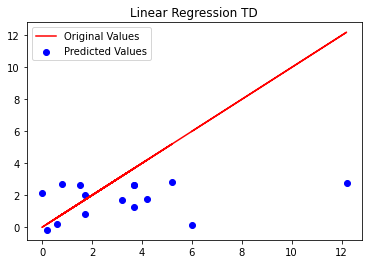

r2 score:  -0.25353936900603347
mean square error:  5.589184292513727


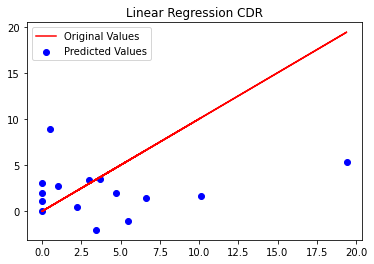

In [13]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression", " CDR")

r2 score:  -0.35598963174233944
mean square error:  3.4769295789994104


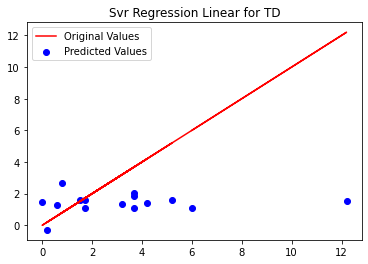

r2 score:  -0.38051124598601405
mean square error:  3.5082269841510065


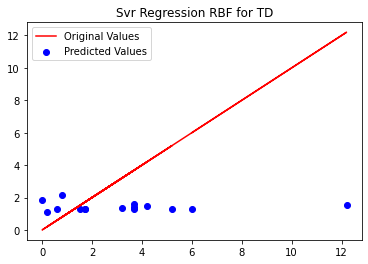

r2 score:  -0.4409516832331666
mean square error:  5.992446289982828


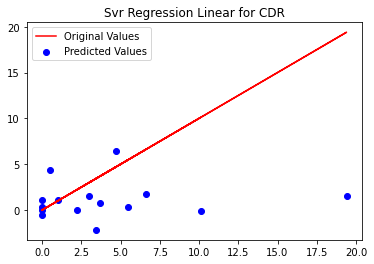

r2 score:  -0.36047959392586626
mean square error:  5.822713972132651


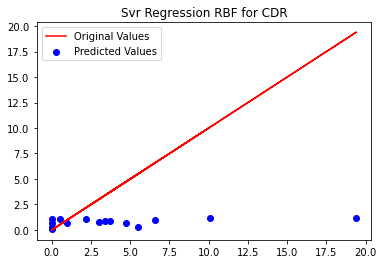

In [14]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
# TD

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " TD", "linear")


X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " TD", "rbf")

#CDR

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " CDR", "linear")


X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " CDR", "rbf")

r2 score:  -0.5154491161251082
mean square error:  3.6756858770393674


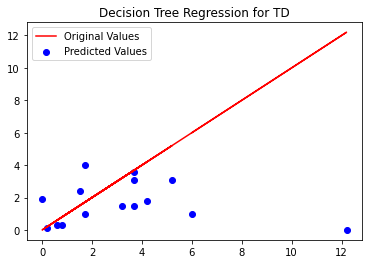

r2 score:  -0.12150757783825639
mean square error:  5.286649852852623


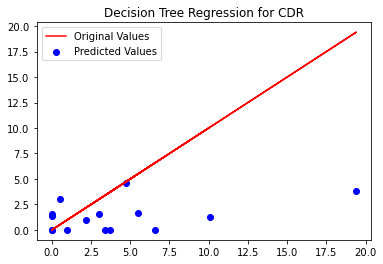

In [15]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " CDR")

r2 score:  -0.17995421847114046
mean square error:  3.243398330969129


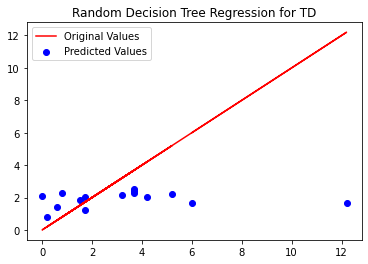

r2 score:  -0.0464972597438269
mean square error:  5.106795753372819


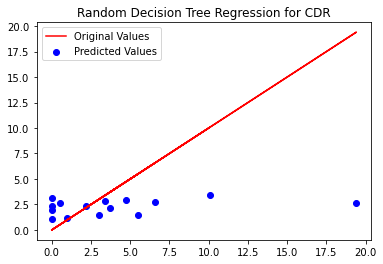

In [16]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " CDR")

r2 score:  -0.22933893565286878
mean square error:  3.3105757435383523


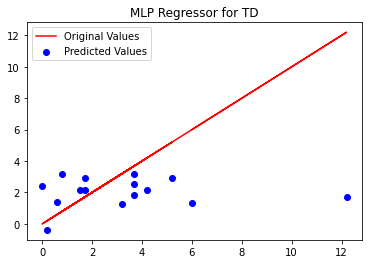

r2 score:  -0.02856110297157821
mean square error:  5.062843339431599


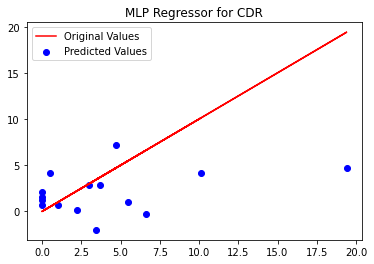

In [17]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " CDR")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [18]:
#split data into train and test data
X = data.iloc[:,1:5]

r2 score:  -0.43316285342176375
mean square error:  3.5745014845540832


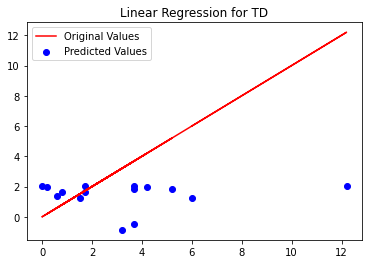

r2 score:  -0.2987740793386193
mean square error:  5.689135099750418


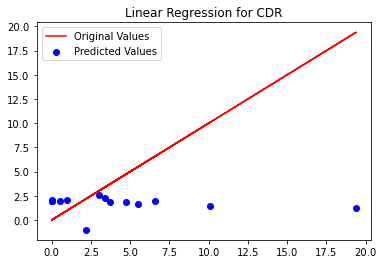

In [19]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression for", " CDR")

r2 score:  -0.5615725140814618
mean square error:  3.7312022303789356


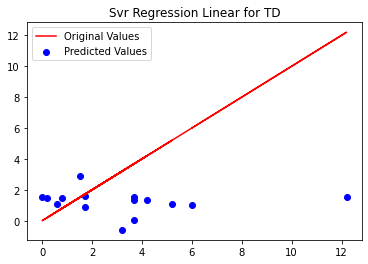

r2 score:  -0.34730726485919927
mean square error:  3.4657803577720414


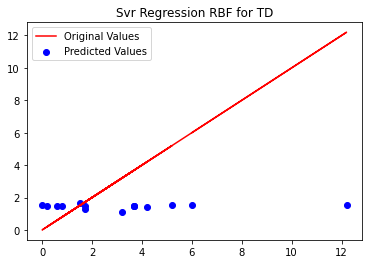

r2 score:  -0.5126070199164545
mean square error:  6.139634200342828


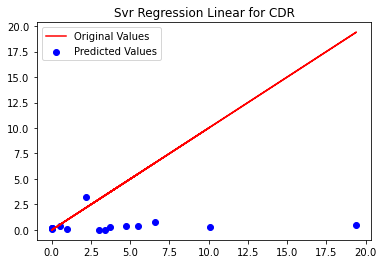

r2 score:  -0.3125656772804468
mean square error:  5.7192616119007225


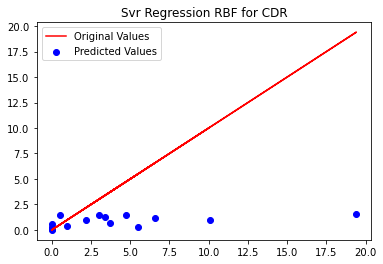

In [20]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " TD", "linear")

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " TD", "rbf")


X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " CDR", "linear")
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " CDR", "rbf")

r2 score:  -0.7443442974366132
mean square error:  3.943517888045309


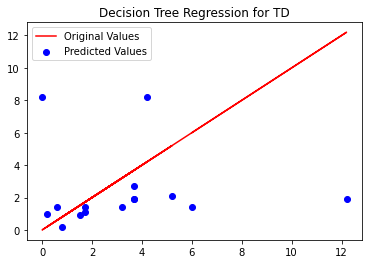

r2 score:  -0.5362912286834292
mean square error:  6.187514309747763


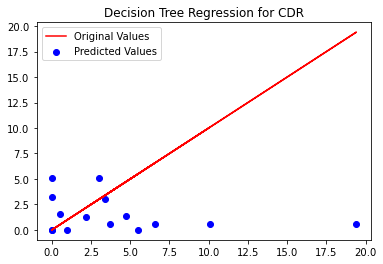

In [21]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " CDR")

r2 score:  -0.16007973069982184
mean square error:  3.21596734021559


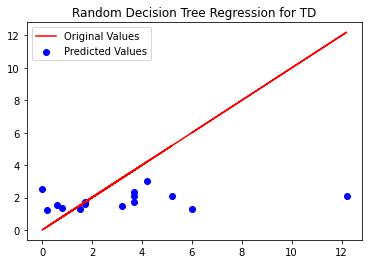

r2 score:  -0.2695481101238786
mean square error:  5.6247603367017645


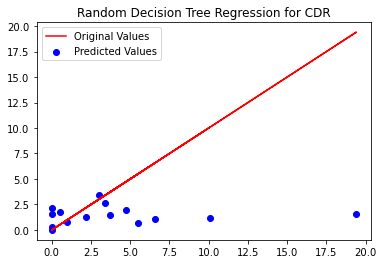

In [22]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " CDR")

r2 score:  -61.272856257646296
mean square error:  23.562268640204596


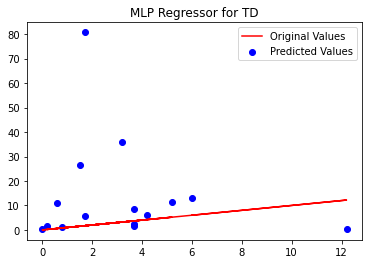

r2 score:  -17.207880432609407
mean square error:  21.301448535920063


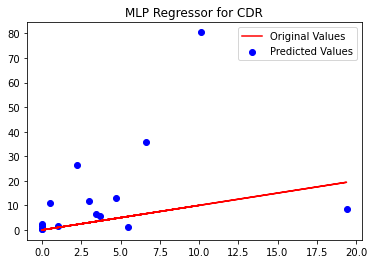

In [23]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " CDR")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [24]:
#split data into train and test data
X = data.iloc[:,[i for i in range(1,17) if i!=5 and i!=6]]

r2 score:  -0.0036332791000988074
mean square error:  2.9912673938784264


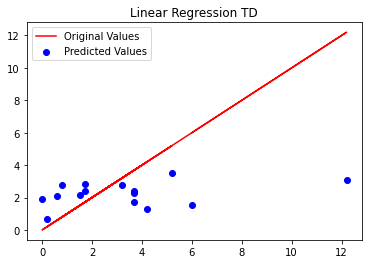

r2 score:  -2.0091415912957844
mean square error:  8.659658238629214


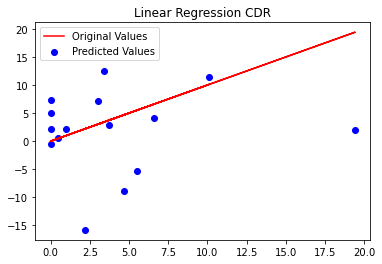

In [25]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
linearRegression(X_train, X_test, y_train, y_test, "Linear Regression", " CDR")

r2 score:  -0.32658363173259874
mean square error:  3.439022580933063


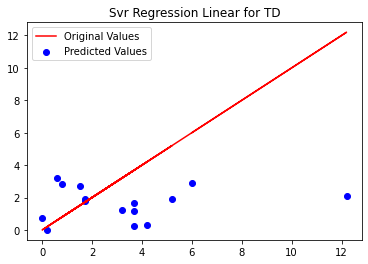

r2 score:  -0.3492932469738719
mean square error:  3.468333763148952


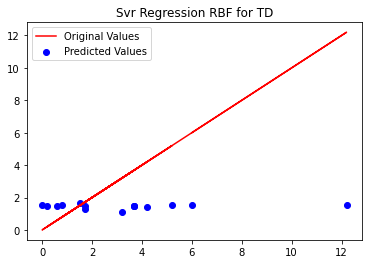

r2 score:  -0.18530504659892655
mean square error:  5.43493691632068


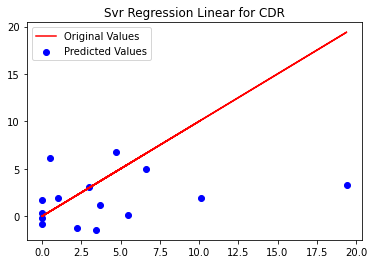

r2 score:  -0.3148527101069667
mean square error:  5.724242104107825


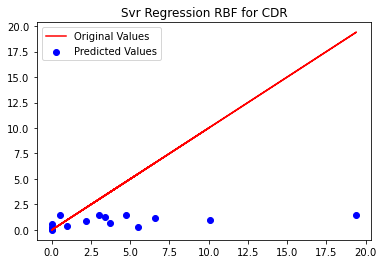

In [26]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
#TD
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " TD", "linear")

X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " TD", "rbf")
#CDR
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression Linear for", " CDR", "linear")
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
svrRegression(X_train, X_test, y_train, y_test, "Svr Regression RBF for", " CDR", "rbf")

r2 score:  -0.25686710469904384
mean square error:  3.347436830372357


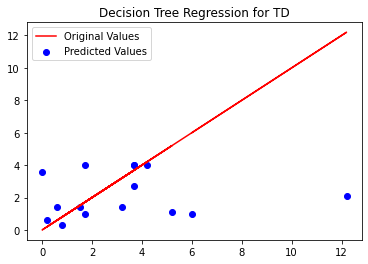

r2 score:  -0.11324133158793992
mean square error:  5.2671307812381745


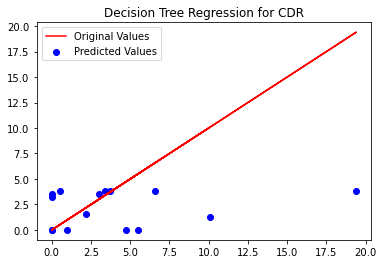

In [27]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
decisionTreeRegression(X_train, X_test, y_train, y_test, "Decision Tree Regression for", " CDR")

r2 score:  0.06398256179147899
mean square error:  2.88874814870848


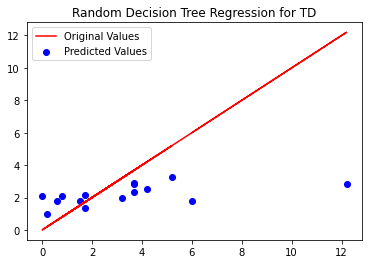

r2 score:  -0.01556895761475574
mean square error:  5.030766376342012


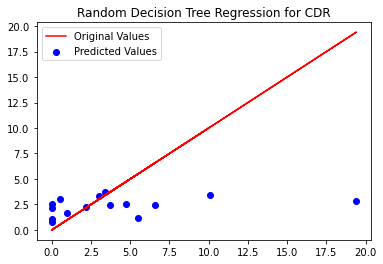

In [28]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
randomDecTreeRegression(X_train, X_test, y_train, y_test, "Random Decision Tree Regression for", " CDR")

r2 score:  -0.8094216754438974
mean square error:  4.016405975296783


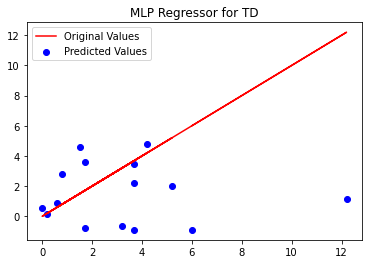

r2 score:  -1.2744407167112315
mean square error:  7.528643826613193


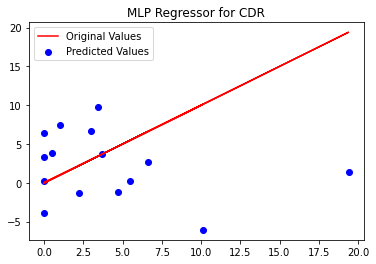

In [29]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
X_train, X_test, y_train, y_test = train_test_split(X, yTD, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " TD")

X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size=0.3, random_state=53)
mlpRegressor(X_train, X_test, y_train, y_test, "MLP Regressor for", " CDR")